# Mail Spam Classification Project

**Objective:**  
Build and evaluate machine learning models to classify emails as spam or not spam.

**Dataset:**  
We use the [Kaggle Email Spam Dataset](https://www.kaggle.com/datasets/balakrishnamp/email-spam-classification-dataset), which contains a collection of emails with extracted features and a target label (`Prediction`) indicating whether each email is spam (1) or not spam (0). The dataset includes numerical features derived from the email content and metadata.

This notebook demonstrates a typical  workflow: data exploration, visualization, model training, evaluation, and saving the best model for future use.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier 
import seaborn as sns
import pickle

In [2]:
emails = pd.read_csv('emails.csv')
emails.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [3]:
emails.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [4]:
emails.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

<Axes: ylabel='count'>

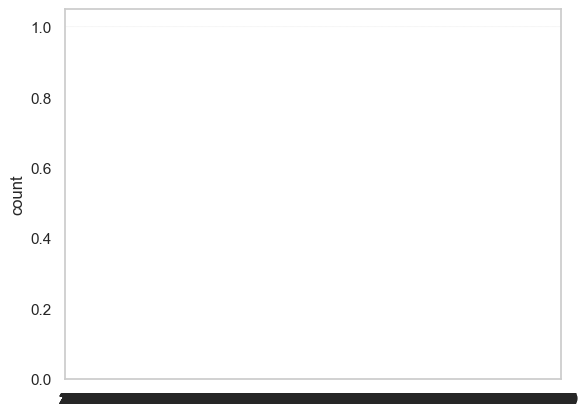

In [5]:
sns.set_style("whitegrid")
sns.set_context("notebook")
sns.set_palette("pastel")
sns.countplot(emails['Prediction'])

In [6]:
X = emails.drop(columns=['Prediction', 'Email No.']) 
y = emails['Prediction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
print(X.shape, X_train.shape, X_test.shape)


(5172, 3000) (4137, 3000) (1035, 3000)


In [8]:
models = {
    "Dummy (Baseline)": DummyClassifier(strategy="most_frequent"),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "k-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(probability=True)  # For AUC-ROC
}

In [9]:
best_model_name = None
best_model = None
best_accuracy = 0
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
   
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    
    
    results.append({
    "Model": name,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1,
    "AUC-ROC": auc_roc
    })

    
    
    # Update the best model if the current model has the highest accuracy
    if accuracy > best_accuracy:
        best_model_name = name
        best_model = model
        best_accuracy = accuracy


c:\Users\Ben Youssef\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [10]:
results_df = pd.DataFrame(results)
results_df.head()

,Model,Accuracy,Precision,Recall,F1-Score,AUC-ROC
0,Dummy (Baseline),0.714010,0.000000,0.000000,0.000000,0.500000
1,Logistic Regression,0.971981,0.943522,0.959459,0.951424,0.989289
2,Naive Bayes,0.954589,0.890282,0.959459,0.923577,0.979355
3,Decision Tree,0.919807,0.865979,0.851351,0.858603,0.899289
4,Random Forest,0.975845,0.962457,0.952703,0.957555,0.997106


In [11]:
print(best_model)

RandomForestClassifier()


In [12]:
filename = 'trained_best_model.sav'
pickle.dump(best_model, open(filename,'wb'))

In [13]:
loaded_model = pickle.load(open('trained_best_model.sav','rb'))

In [14]:
training_columns = X.columns.tolist()
pickle.dump(training_columns, open('training_columns.pkl', 'wb'))